In [4]:
# Bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular la estacionalidad, tendecia y residuo
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [10]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/Hannahborrego17/Fisicacomputacional1/master/Actividad%201/datos%20diarios.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122 entries, 0 to 18121
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   18122 non-null  datetime64[ns]
 1   Precip  18117 non-null  float64       
 2   Evap    9636 non-null   float64       
 3   Tmax    18047 non-null  float64       
 4   Tmin    18061 non-null  float64       
 5   Año     18122 non-null  int64         
 6   Mes     18122 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 991.2 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1950-01-01     0.0   NaN  34.0   9.0  1950    1
1 1950-01-02     0.0   NaN  25.0  12.0  1950    1
2 1950-01-03     0.0   NaN  30.0  13.0  1950    1
3 1950-01-04     0.0   NaN  20.0   8.0  1950    1
4 1950-01-05     0.0   NaN  28.0   5.0  1950    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
18117 2005-11-26     0.0   6.0  31.0   6.0  2005   11
18118 2005-11-27 

Creamos una Serie de Tiempo, fijando a la variable 'Fecha' como nuevo índice del DataFrame

In [11]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

#Se verifica
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18122 entries, 1950-01-01 to 2005-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  18117 non-null  float64
 1   Evap    9636 non-null   float64
 2   Tmax    18047 non-null  float64
 3   Tmin    18061 non-null  float64
 4   Año     18122 non-null  int64  
 5   Mes     18122 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 991.0 KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1950-01-01     0.0   NaN  34.0   9.0  1950    1
1950-01-02     0.0   NaN  25.0  12.0  1950    1
1950-01-03     0.0   NaN  30.0  13.0  1950    1
1950-01-04     0.0   NaN  20.0   8.0  1950    1
1950-01-05     0.0   NaN  28.0   5.0  1950    1
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2005-11-26     0.0   6.0  31.0   6.0  2005   11
2005-11-27     0.0   6.0  31.0   6.0  2005   11

In [12]:
# Seleccionamos un conjunto de 30 años
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1950) & (df_meteo_ts['Año'] < 1980)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1980) & (df_meteo_ts['Año'] < 2010)]

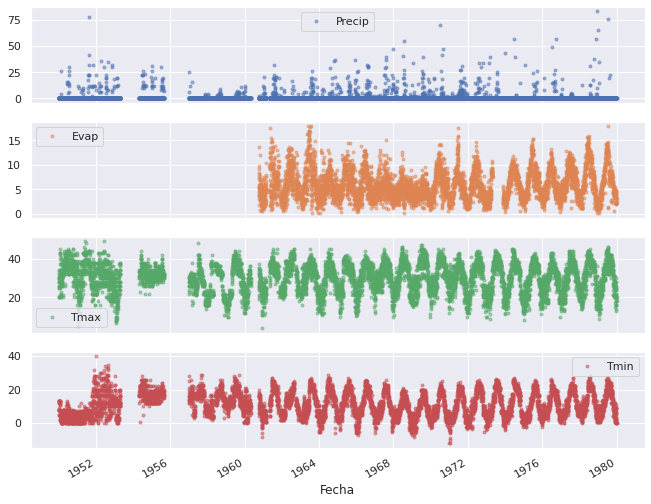

In [13]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes
cols_plot = ['Precip','Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax C', 'Tmin (C)']
axes = df_30[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

Variación en Precipitación promedio 60-30 : 0.38856397542918597


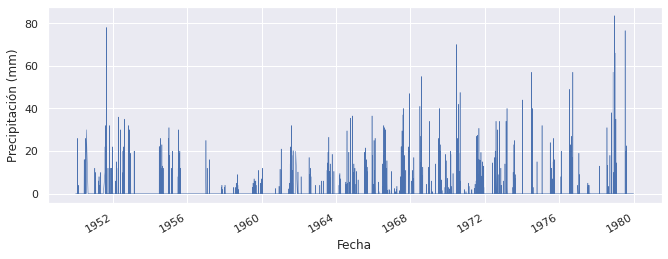

In [14]:
# Graficamos la Precipitación de los últimos 30 años (1975-hasta 2005)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_30 = df_30.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()

df_30['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)

Variación C Tmax promedio 60-30 : 0.3155794617470171


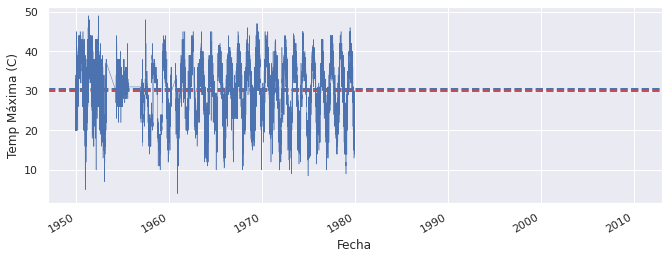

In [15]:
# Graficamos la Tmax de los últimos 30 años (1980-hasta 2010)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_60 = df_60.Tmax.mean()
Tmax_ave_30 = df_30.Tmax.mean()
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_30, color = 'r', linestyle='--', linewidth=2);
df_30['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (C)');
print('Variación C Tmax promedio 60-30 :', Tmax_ave_60-Tmax_ave_30)

Variación C Tmin promedio 60-30 : 19.031742112017575


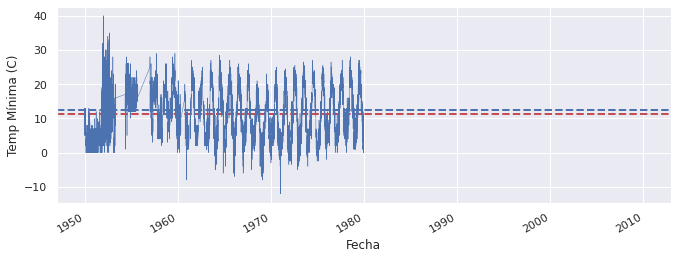

In [16]:
# Graficamos la Tmin de los últimos 30 años (1980-hasta 2010)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_60 = df_60.Tmin.mean()
Tmin_ave_30 = df_30.Tmin.mean()
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_30, color = 'r', linestyle='--', linewidth=2);
df_30['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (C)');
print('Variación C Tmin promedio 60-30 :', Tmax_ave_60-Tmin_ave_30)

Variación ºC Tmin promedio 90s-60s : 0.0


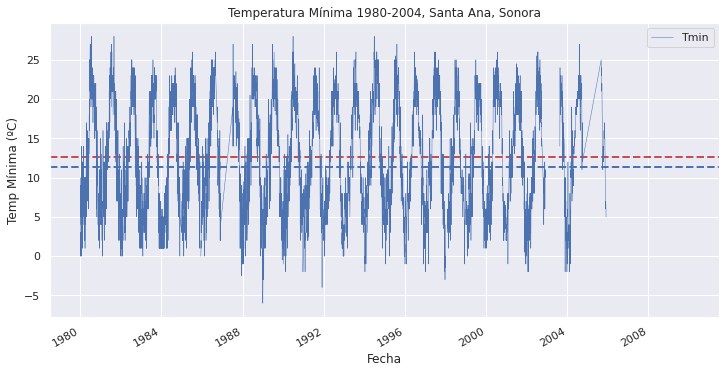

In [17]:
# Hacemos lo mismo que la gráfica anterior con la Tmin
# Graficamos la Tmin de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_60 = df_60.Tmin.mean()
Tmin_ave_30 = df_30.Tmin.mean()

plt.axhline(Tmin_ave_60, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_30, color = 'b', linestyle='--', linewidth=2);

df_60['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1980-2004, Santa Ana, Sonora')

plt.legend();



print('Variación ºC Tmin promedio 90s-60s :', Tmin_ave_60-Tmin_ave_60)

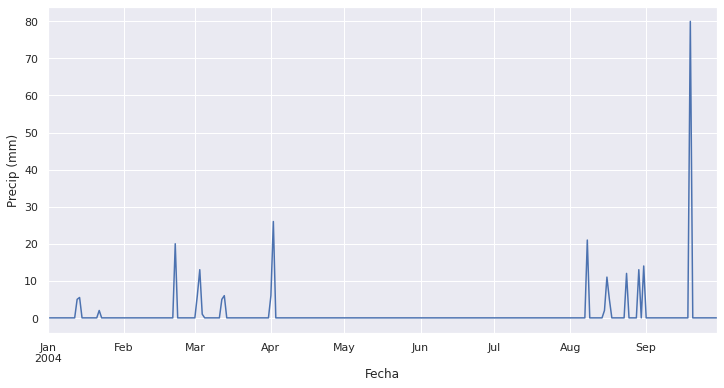

In [18]:
# Investigando un año de datos
ax = df_60.loc['2004', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

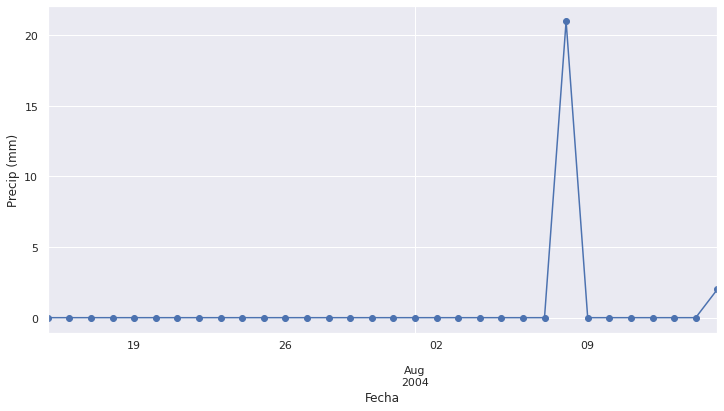

In [19]:
# INvestigando un periodo de datos
ax = df_60.loc['2004-07-15':'2004-08-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

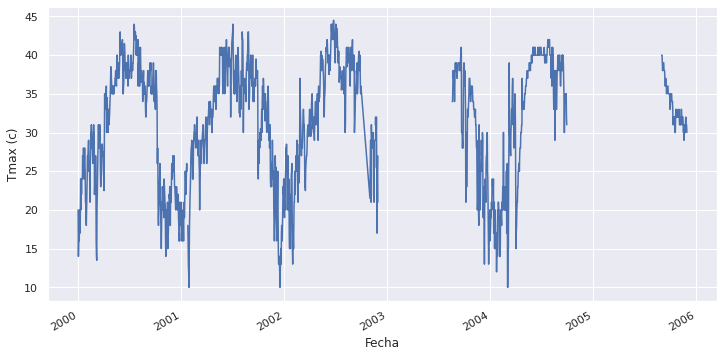

In [20]:
# Investigando un rango de datos
ax = df_60.loc['2000':'2005', 'Tmax'].plot()
ax.set_ylabel('Tmax (c)');

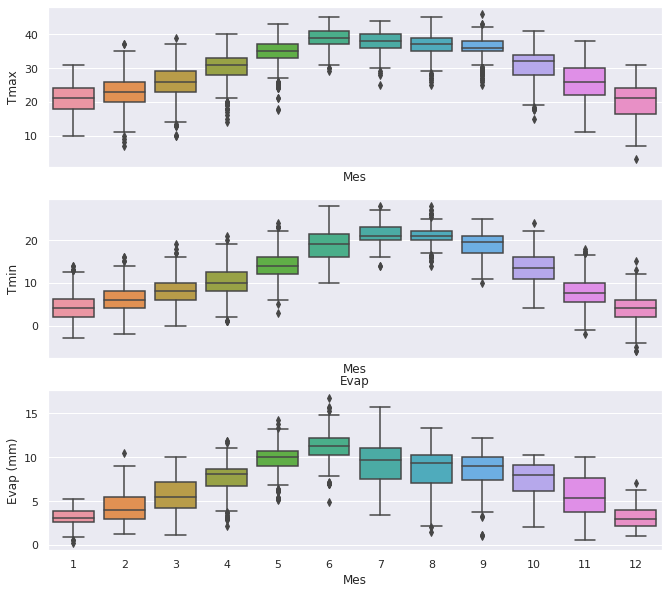

In [21]:
# Analizando estacionalidad de los datos, similar a lo que ya hicimos anteriormente
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_60, x='Mes', y=name, ax=ax)
if name != 'Evap':
    ax.set_ylabel('Temp (C)')
else:
      ax.set_ylabel('Evap (mm)')
ax.set_title(name) 
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo
if ax != axes[-1]:
        ax.set_xlabel('')


In [55]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_60_7d = df_60[data_cols].rolling(7, center=True,min_periods=1).mean()
df_60_30d = df_60[data_cols].rolling(30, center=True,min_periods=1).mean()
df_60_365d = df_60[data_cols].rolling(365, center=True,min_periods=1).mean()

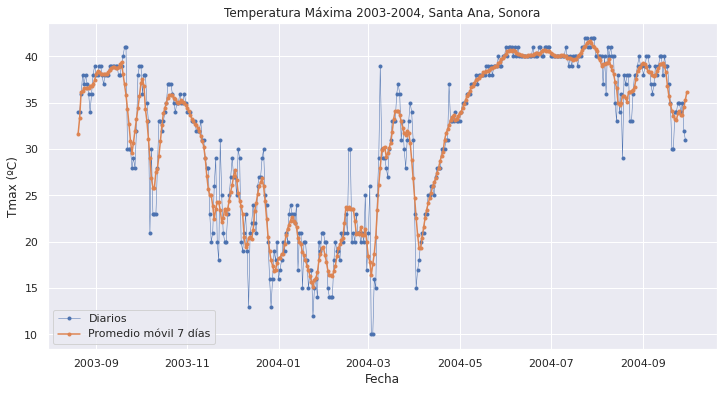

In [56]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2003-01', '2004-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_60.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_60_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2003-2004, Santa Ana, Sonora')
ax.legend();

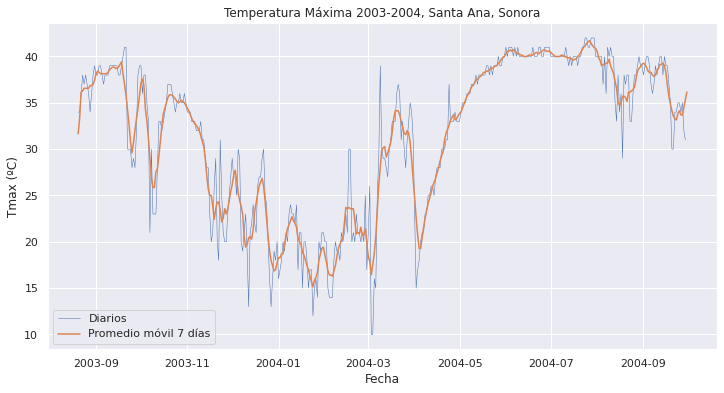

In [57]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '2003-01', '2004-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_60.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_60_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2003-2004, Santa Ana, Sonora')
ax.legend();

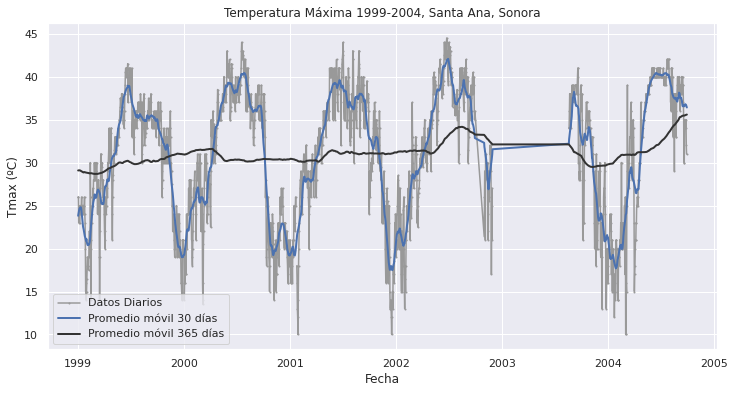

In [58]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '1999-01', '2004-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_60.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_60_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_60_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1999-2004, Santa Ana, Sonora')
ax.legend();

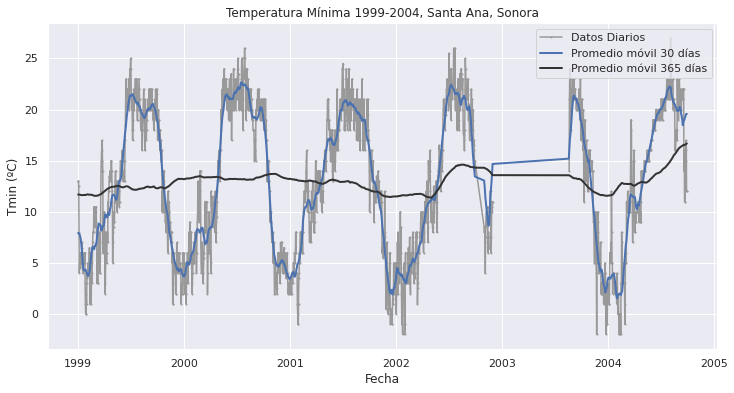

In [73]:
# Tendencias ... año con año para Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '1999-01', '2004-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_60.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_60_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_60_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 1999-2004, Santa Ana, Sonora')
ax.legend();

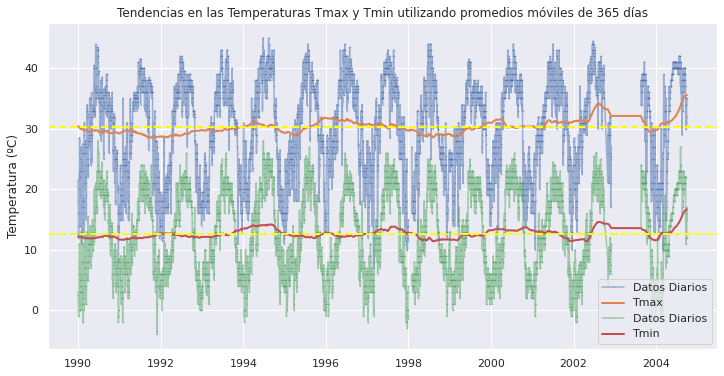

In [60]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2004-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_60.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_60_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_60.loc[start:end, nm].mean(), color = 'yellow', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

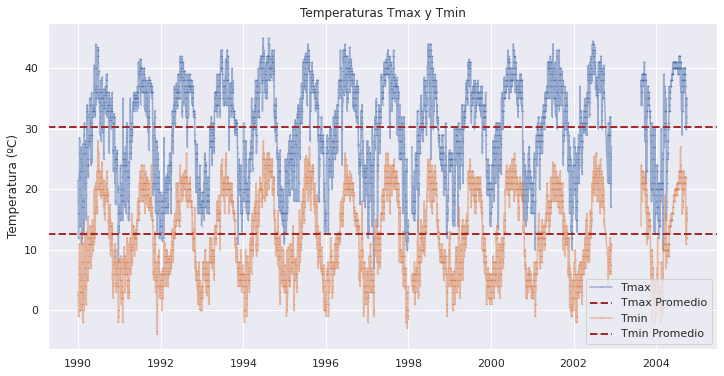

In [61]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2004-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_60.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_60.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

Análisis de tendencias de Tmax

In [62]:
df_60_365d.info()
print(df_60_365d.head(185))
print(df_60_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8536 entries, 1980-01-01 to 2005-11-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    4197 non-null   float64
 1   Tmax    8536 non-null   float64
 2   Tmin    8536 non-null   float64
dtypes: float64(3)
memory usage: 586.8 KB
                Evap       Tmax       Tmin
Fecha                                     
1980-01-01  7.059341  28.874863  10.043716
1980-01-02  7.090710  28.935326  10.108696
1980-01-03  7.113587  29.005946  10.162162
1980-01-04  7.130270  29.065054  10.231183
1980-01-05  7.170968  29.123529  10.294118
...              ...        ...        ...
1980-06-29  6.577562  30.815702  12.661157
1980-06-30  6.569061  30.813462  12.640110
1980-07-01  6.558127  30.803014  12.646575
1980-07-02  6.560606  30.816712  12.673973
1980-07-03  6.561157  30.822192  12.693151

[185 rows x 3 columns]
                Evap       Tmax       Tmin
Fecha                  

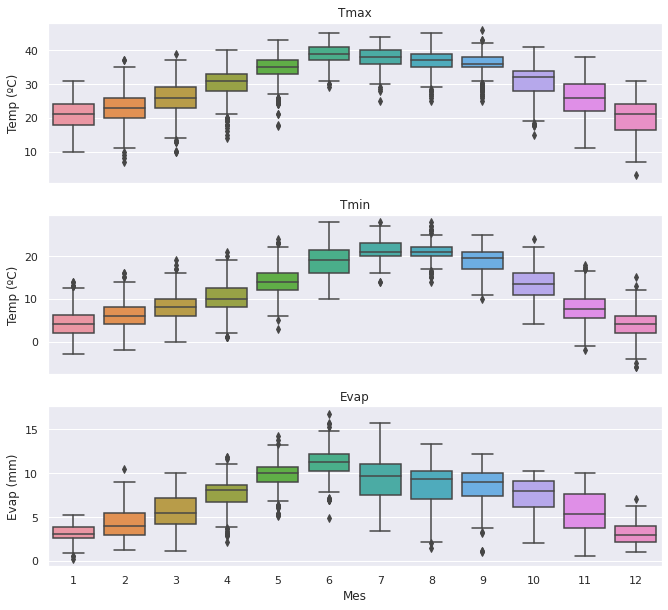

In [63]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_60, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

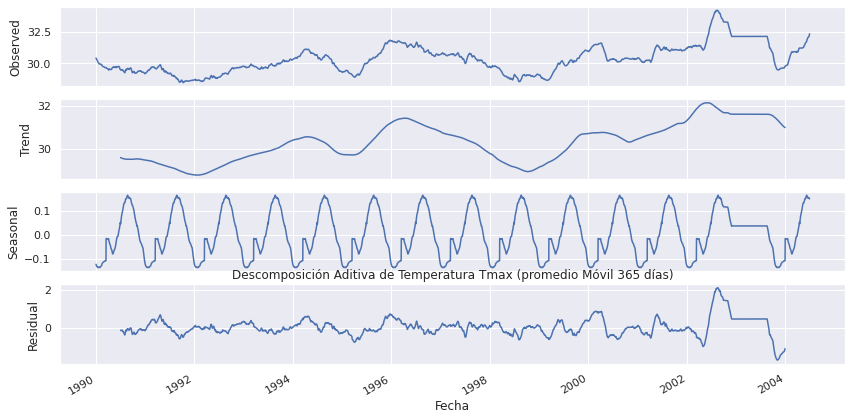

In [64]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_60_365d.loc[start:end, 'Tmax'].interpolate(),freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

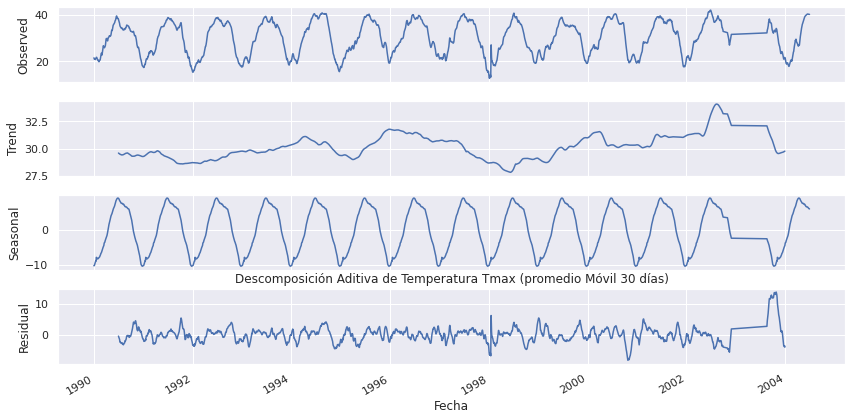

In [65]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_60_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

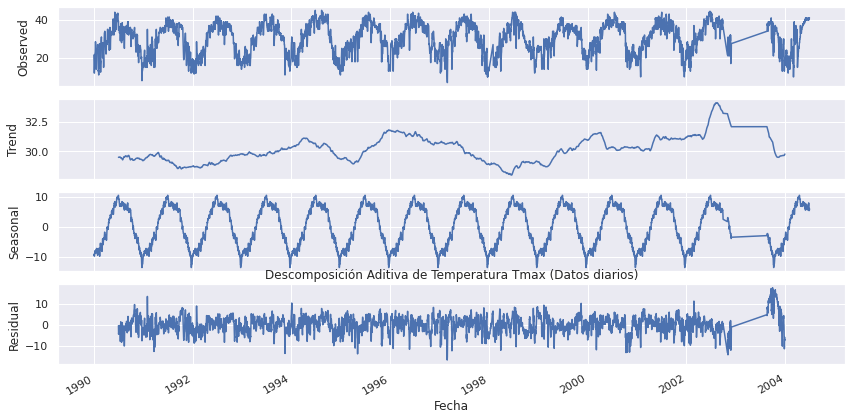

In [66]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_60.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

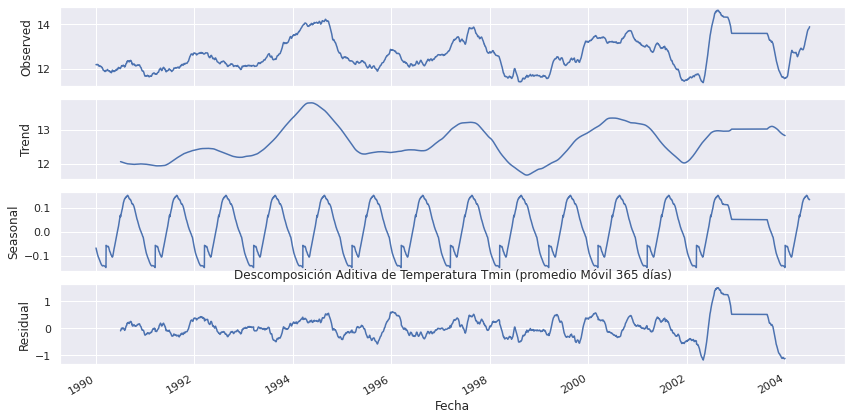

In [67]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_60_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

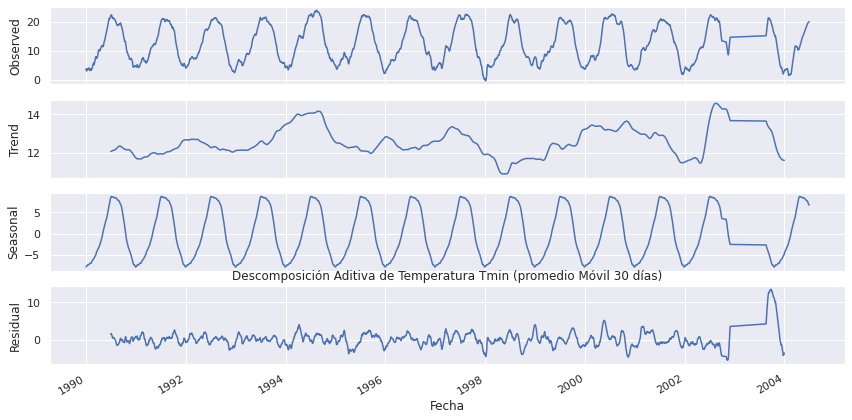

In [68]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_60_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

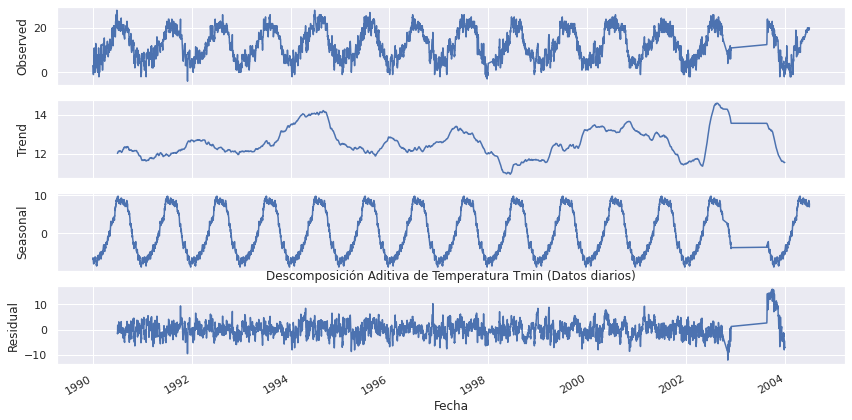

In [69]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2004-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_60.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

In [70]:
resTmax.trend.describe()

count    4638.000000
mean       30.134068
std         1.078209
min        27.973973
25%        29.322260
50%        30.076712
75%        30.866096
max        34.125342
Name: Tmax, dtype: float64

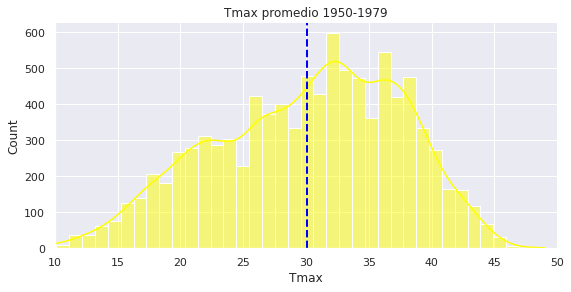

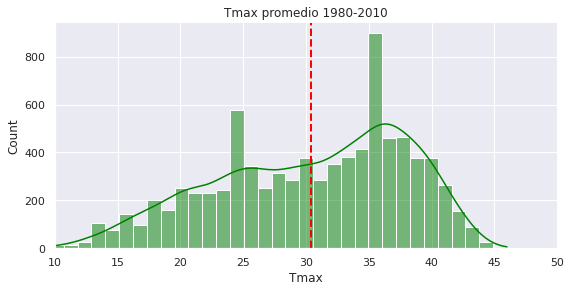

Tmax_promedio df_30 =  30.077839422171042 ºC
Tmax_promedio df_60 =  30.39341888391806 ºC


In [71]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30.Tmax, kde=True, color='yellow', height=4, aspect=2);
plt.axvline(df_30.Tmax.mean(), linestyle='--', linewidth=2, color='blue');

g2 = sns.displot(df_60.Tmax, kde=True, color='green', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='red');


g1.set(title='Tmax promedio 1950-1979');
g2.set(title='Tmax promedio 1980-2010');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))



plt.show();

print('Tmax_promedio df_30 = ', df_30.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )

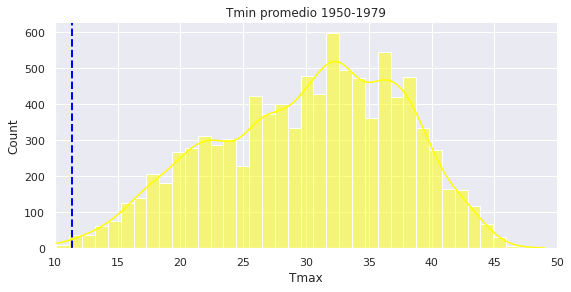

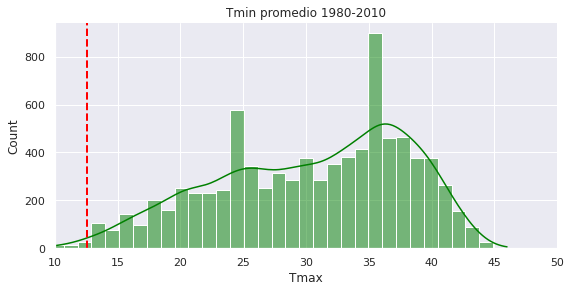

Tmin_promedio df_30 =  11.361676771900484 ºC
Tmin_promedio df_60 =  12.572889935256033 ºC


In [72]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30.Tmax, kde=True, color='yellow', height=4, aspect=2);
plt.axvline(df_30.Tmin.mean(), linestyle='--', linewidth=2, color='blue');

g2 = sns.displot(df_60.Tmax, kde=True, color='green', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='red');


g1.set(title='Tmin promedio 1950-1979');
g2.set(title='Tmin promedio 1980-2010');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))



plt.show();

print('Tmin_promedio df_30 = ', df_30.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )